# NYC311 Analysis Project


## Data Ingestion and SQL Sourcing

In [7]:
import sqlite3
import pandas as pd

creating my sqlite database

In [8]:
DB_PATH = "nyc311.db"
conn = sqlite3.connect(DB_PATH)


#### Counting total rows - NEEDS THE ACTUAL NYC311 DATA TO RUN

In [9]:
CSV_PATH = "../data/311-service-requests-from-2010-to-present.csv"
total_rows = sum(1 for _ in open(CSV_PATH)) - 1  
print(f"Total rows in CSV: {total_rows}")


Total rows in CSV: 21960000


Loading 5 million rows into my database - NEEDS THE ACTUAL NYC311 DATA TO RUN

In [1]:
import pandas as pd
import sqlite3

CSV_PATH = "../data/311-service-requests-from-2010-to-present.csv"
DB_PATH = "nyc311.db"

                 
selected_columns = [
    "Unique Key",
    "Created Date",
    "Closed Date",
    "Complaint Type",
    "Descriptor",
    "Status",
    "Resolution Description",
    "Borough",
    "Incident Zip",
    "Latitude",
    "Longitude",
    "Agency Name"
]

conn = sqlite3.connect(DB_PATH)

chunksize = 500_000
total_rows_needed = 5_000_000
rows_written = 0
first_chunk = True

for i, chunk in enumerate(pd.read_csv(CSV_PATH, chunksize=chunksize, low_memory=False), start=1):
    
    chunk = chunk[selected_columns]
    
    chunk["Created Date"] = pd.to_datetime(chunk["Created Date"], errors="coerce", format="%Y-%m-%dT%H:%M:%S.%f")
    chunk["Closed Date"] = pd.to_datetime(chunk["Closed Date"], errors="coerce", format="%Y-%m-%dT%H:%M:%S.%f")
    
    
    rows_remaining = total_rows_needed - rows_written
    if len(chunk) > rows_remaining:
        chunk = chunk.iloc[:rows_remaining]
    
    chunk.to_sql(
        "nyc311_raw",
        conn,
        if_exists="replace" if first_chunk else "append",
        index=False
    )
    
    rows_written += len(chunk)
    first_chunk = False
    
    print(f"Chunk {i}: wrote {len(chunk)} rows, total rows so far: {rows_written}")
    
    if rows_written >= total_rows_needed:
        break

print(f"Finished writing {rows_written} rows to nyc311_raw")
conn.close()


C:\Users\HP\AppData\Local\Temp\ipykernel_10516\2432023578.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk["Created Date"] = pd.to_datetime(chunk["Created Date"], errors="coerce", format="%Y-%m-%dT%H:%M:%S.%f")
C:\Users\HP\AppData\Local\Temp\ipykernel_10516\2432023578.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk["Closed Date"] = pd.to_datetime(chunk["Closed Date"], errors="coerce", format="%Y-%m-%dT%H:%M:%S.%f")


Chunk 1: wrote 500000 rows, total rows so far: 500000


C:\Users\HP\AppData\Local\Temp\ipykernel_10516\2432023578.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk["Created Date"] = pd.to_datetime(chunk["Created Date"], errors="coerce", format="%Y-%m-%dT%H:%M:%S.%f")
C:\Users\HP\AppData\Local\Temp\ipykernel_10516\2432023578.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk["Closed Date"] = pd.to_datetime(chunk["Closed Date"], errors="coerce", format="%Y-%m-%dT%H:%M:%S.%f")


Chunk 2: wrote 500000 rows, total rows so far: 1000000


C:\Users\HP\AppData\Local\Temp\ipykernel_10516\2432023578.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk["Created Date"] = pd.to_datetime(chunk["Created Date"], errors="coerce", format="%Y-%m-%dT%H:%M:%S.%f")
C:\Users\HP\AppData\Local\Temp\ipykernel_10516\2432023578.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk["Closed Date"] = pd.to_datetime(chunk["Closed Date"], errors="coerce", format="%Y-%m-%dT%H:%M:%S.%f")


Chunk 3: wrote 500000 rows, total rows so far: 1500000


C:\Users\HP\AppData\Local\Temp\ipykernel_10516\2432023578.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk["Created Date"] = pd.to_datetime(chunk["Created Date"], errors="coerce", format="%Y-%m-%dT%H:%M:%S.%f")
C:\Users\HP\AppData\Local\Temp\ipykernel_10516\2432023578.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk["Closed Date"] = pd.to_datetime(chunk["Closed Date"], errors="coerce", format="%Y-%m-%dT%H:%M:%S.%f")


Chunk 4: wrote 500000 rows, total rows so far: 2000000


C:\Users\HP\AppData\Local\Temp\ipykernel_10516\2432023578.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk["Created Date"] = pd.to_datetime(chunk["Created Date"], errors="coerce", format="%Y-%m-%dT%H:%M:%S.%f")
C:\Users\HP\AppData\Local\Temp\ipykernel_10516\2432023578.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk["Closed Date"] = pd.to_datetime(chunk["Closed Date"], errors="coerce", format="%Y-%m-%dT%H:%M:%S.%f")


Chunk 5: wrote 500000 rows, total rows so far: 2500000


C:\Users\HP\AppData\Local\Temp\ipykernel_10516\2432023578.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk["Created Date"] = pd.to_datetime(chunk["Created Date"], errors="coerce", format="%Y-%m-%dT%H:%M:%S.%f")
C:\Users\HP\AppData\Local\Temp\ipykernel_10516\2432023578.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk["Closed Date"] = pd.to_datetime(chunk["Closed Date"], errors="coerce", format="%Y-%m-%dT%H:%M:%S.%f")


Chunk 6: wrote 500000 rows, total rows so far: 3000000


C:\Users\HP\AppData\Local\Temp\ipykernel_10516\2432023578.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk["Created Date"] = pd.to_datetime(chunk["Created Date"], errors="coerce", format="%Y-%m-%dT%H:%M:%S.%f")
C:\Users\HP\AppData\Local\Temp\ipykernel_10516\2432023578.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk["Closed Date"] = pd.to_datetime(chunk["Closed Date"], errors="coerce", format="%Y-%m-%dT%H:%M:%S.%f")


Chunk 7: wrote 500000 rows, total rows so far: 3500000


C:\Users\HP\AppData\Local\Temp\ipykernel_10516\2432023578.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk["Created Date"] = pd.to_datetime(chunk["Created Date"], errors="coerce", format="%Y-%m-%dT%H:%M:%S.%f")
C:\Users\HP\AppData\Local\Temp\ipykernel_10516\2432023578.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk["Closed Date"] = pd.to_datetime(chunk["Closed Date"], errors="coerce", format="%Y-%m-%dT%H:%M:%S.%f")


Chunk 8: wrote 500000 rows, total rows so far: 4000000


C:\Users\HP\AppData\Local\Temp\ipykernel_10516\2432023578.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk["Created Date"] = pd.to_datetime(chunk["Created Date"], errors="coerce", format="%Y-%m-%dT%H:%M:%S.%f")
C:\Users\HP\AppData\Local\Temp\ipykernel_10516\2432023578.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk["Closed Date"] = pd.to_datetime(chunk["Closed Date"], errors="coerce", format="%Y-%m-%dT%H:%M:%S.%f")


Chunk 9: wrote 500000 rows, total rows so far: 4500000


C:\Users\HP\AppData\Local\Temp\ipykernel_10516\2432023578.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk["Created Date"] = pd.to_datetime(chunk["Created Date"], errors="coerce", format="%Y-%m-%dT%H:%M:%S.%f")
C:\Users\HP\AppData\Local\Temp\ipykernel_10516\2432023578.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk["Closed Date"] = pd.to_datetime(chunk["Closed Date"], errors="coerce", format="%Y-%m-%dT%H:%M:%S.%f")


Chunk 10: wrote 500000 rows, total rows so far: 5000000
Finished writing 5000000 rows to nyc311_raw


checking the tables in my database and checking the rows in it

In [10]:

conn = sqlite3.connect("nyc311.db")

tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)

row_count = pd.read_sql("SELECT COUNT(*) as total_rows FROM nyc311_raw;", conn)
print(row_count)

conn.close()

         name
0  nyc311_raw
   total_rows
0     5000000


importing the data to be analyzed

In [4]:
conn = sqlite3.connect("nyc311.db")  

df = pd.read_sql_query("SELECT * FROM nyc311_raw", conn)

In [5]:
df.shape


(5000000, 12)

## Data Cleaning and Profiling

first 10 rows in the database

In [6]:
df.head(10)

,Unique Key,Created Date,Closed Date,Complaint Type,Descriptor,Status,Resolution Description,Borough,Incident Zip,Latitude,Longitude,Agency Name
0,45050101,2019-12-01 02:04:01,None,Street Condition,Pothole,Open,The Department of Transportation referred this...,MANHATTAN,10001.0,40.745668,-73.987719,Department of Transportation
1,45054936,2019-12-01 01:59:41,None,Noise - Commercial,Loud Music/Party,In Progress,None,BROOKLYN,11223.0,40.596475,-73.977721,New York City Police Department
2,45049329,2019-12-01 01:59:08,None,Noise - Residential,Loud Music/Party,In Progress,None,BROOKLYN,11207.0,40.660605,-73.883508,New York City Police Department
3,45052046,2019-12-01 01:58:23,None,Noise - Residential,Loud Music/Party,In Progress,None,QUEENS,11358.0,40.759994,-73.806856,New York City Police Department
4,45054999,2019-12-01 01:58:07,None,Illegal Parking,Commercial Overnight Parking,In Progress,None,QUEENS,11426.0,40.729499,-73.729998,New York City Police Department
5,45050500,2019-12-01 01:57:49,None,Noise - Residential,Loud Music/Party,In Progress,None,MANHATTAN,10032.0,40.844255,-73.939790,New York City Police Department
6,45049237,2019-12-01 01:57:48,None,Noise - Residential,Banging/Pounding,In Progress,None,BRONX,10452.0,40.832563,-73.921982,New York City Police Department
7,45054972,2019-12-01 01:57:30,None,Noise - Commercial,Loud Music/Party,In Progress,None,MANHATTAN,10009.0,40.729526,-73.983872,New York City Police Department
8,45050524,2019-12-01 01:57:30,None,Taxi Complaint,Driver Complaint - Non Passenger,In Progress,None,MANHATTAN,10001.0,40.750282,-73.987646,Taxi and Limousine Commission
9,45053708,2019-12-01 01:57:21,None,Noise - Residential,Loud Music/Party,In Progress,None,MANHATTAN,10003.0,40.731500,-73.985571,New York City Police Department


information on the columns

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unique Key              int64  
 1   Created Date            object 
 2   Closed Date             object 
 3   Complaint Type          object 
 4   Descriptor              object 
 5   Status                  object 
 6   Resolution Description  object 
 7   Borough                 object 
 8   Incident Zip            float64
 9   Latitude                float64
 10  Longitude               float64
 11  Agency Name             object 
dtypes: float64(3), int64(1), object(8)
memory usage: 457.8+ MB


the earliest and latest date - wanted to know the timeframe

In [8]:
df["Created Date"].min(), df["Created Date"].max()


('2019-09-22 11:38:12', '2019-12-01 02:04:01')

number of missing values for each column

In [9]:
df.isna().sum().sort_values(ascending=False).head(30)


Resolution Description    588117
Closed Date               523734
Latitude                  176222
Longitude                 176222
Incident Zip              134017
Descriptor                123324
Unique Key                     0
Created Date                   0
Complaint Type                 0
Status                         0
Borough                        0
Agency Name                    0
dtype: int64

changed the created date column datatype from string to datetime

In [10]:
df["Created Date"] = pd.to_datetime(
    df["Created Date"],
    errors="coerce"
)

df["Closed Date"] = pd.to_datetime(
    df["Closed Date"],
    errors="coerce"
)


In [11]:
df[["Created Date", "Closed Date"]].dtypes


Created Date    datetime64[ns]
Closed Date     datetime64[ns]
dtype: object

created a feature called response time - this is basically the gap from the time the complaint was made to when it was resolved

In [12]:
df["Response Time (hrs)"] = (df["Closed Date"] - df["Created Date"]).dt.total_seconds() / 3600

In [13]:
df["Response Time (hrs)"].describe()

count    4.476266e+06
mean     1.070944e+02
std      2.562367e+02
min     -1.128000e+03
25%      2.208889e+00
50%      7.867778e+00
75%      6.384417e+01
max      1.618442e+03
Name: Response Time (hrs), dtype: float64

finding out the number of negative response times


In [14]:
(df["Response Time (hrs)"] < 0).sum()


37578

percentage of invalid response times

In [15]:
(df["Response Time (hrs)"] < 0).mean() * 100


0.75156

In [16]:
df["Response Time Clean (hrs)"] = df["Response Time (hrs)"].where(
    df["Response Time (hrs)"] >= 0
)


In [17]:
df["Response Time Clean (hrs)"].describe()



count    4.438688e+06
mean     1.085297e+02
std      2.567855e+02
min      0.000000e+00
25%      2.278056e+00
50%      8.064722e+00
75%      6.480083e+01
max      1.618442e+03
Name: Response Time Clean (hrs), dtype: float64

top 15 nyc complaints

In [18]:
df["Complaint Type"].value_counts().head(15)


Complaint Type
Illegal Parking                  561656
Noise - Residential              488163
Blocked Driveway                 375195
Noise - Street/Sidewalk          330104
For Hire Vehicle Complaint       197329
Street Condition                 159574
Noise - Vehicle                  151473
Water System                     125220
Abandoned Vehicle                114825
Street Light Condition           114147
Sidewalk Condition               110524
General Construction/Plumbing    109867
HEAT/HOT WATER                   107831
UNSANITARY CONDITION             106163
Noise                            102855
Name: count, dtype: int64

Borough distribution of complaints

In [19]:
df["Borough"].value_counts()


Borough
BROOKLYN         1545240
QUEENS           1300075
MANHATTAN        1116196
BRONX             771718
STATEN ISLAND     225935
Unspecified        40836
Name: count, dtype: int64

status distribution after complaints

In [20]:
df["Status"].value_counts()

Status
Closed         4395837
In Progress     480538
Pending          40662
Open             40364
Assigned         34734
Started           7865
Name: count, dtype: int64

In [21]:
resolved_df = df[
    (df["Status"] == "Closed") &
    (df["Response Time Clean (hrs)"].notna())
]


In [22]:
resolved_df.shape[0]


4395831

how fast does nyc respond?

In [23]:
resolved_df["Response Time Clean (hrs)"].describe()

count    4.395831e+06
mean     1.041400e+02
std      2.476501e+02
min      0.000000e+00
25%      2.299444e+00
50%      8.019167e+00
75%      6.360944e+01
max      1.618442e+03
Name: Response Time Clean (hrs), dtype: float64

how fast does ncy respond based on the boroughs

In [24]:
resolved_df.groupby("Borough")["Response Time Clean (hrs)"].median().sort_values()


Borough
QUEENS            7.044167
BROOKLYN          7.746111
MANHATTAN         7.928056
BRONX             9.807778
STATEN ISLAND    10.665833
Unspecified      72.950000
Name: Response Time Clean (hrs), dtype: float64

how fast does nyc respond according to complaints

In [25]:
top_complaints = df["Complaint Type"].value_counts().head(10).index

resolved_df[
    resolved_df["Complaint Type"].isin(top_complaints)
].groupby("Complaint Type")["Response Time Clean (hrs)"].median().sort_values()


Complaint Type
Noise - Vehicle                 2.197500
Noise - Street/Sidewalk         3.038889
Noise - Residential             3.338056
Illegal Parking                 4.030000
Blocked Driveway                5.025000
Abandoned Vehicle               5.853889
Water System                    6.383333
Street Light Condition         26.350000
Street Condition               32.830278
For Hire Vehicle Complaint    743.034444
Name: Response Time Clean (hrs), dtype: float64

### Manual Data Profiling Diagram Generation - as a result of library version incompatibility

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12


In [ ]:
fig, ax = plt.subplots()
ax.axis("off")

text = (
    "CSV Source\n"
    "↓\n"
    "SQLite Database\n"
    "↓\n"
    "Python (Pandas)\n"
    "↓\n"
    "Data Profiling Report"
)

ax.text(0.5, 0.5, text, ha="center", va="center", fontsize=14)
plt.savefig("dataset_pipeline.png", bbox_inches="tight")
plt.close()


In [ ]:
dtype_counts = df.dtypes.value_counts()

plt.figure()
dtype_counts.plot(kind="bar")
plt.title("Column Data Type Composition")
plt.ylabel("Number of Columns")
plt.xlabel("Data Type")
plt.tight_layout()
plt.savefig("column_data_types.png")
plt.close()


In [30]:
missing_pct = df.isna().mean().sort_values(ascending=False) * 100

plt.figure()
missing_pct.plot(kind="barh")
plt.title("Missing Data Percentage by Column")
plt.xlabel("Percentage Missing")
plt.tight_layout()
plt.savefig("missing_percentage_by_column.png")
plt.close()


In [32]:
sample = df.sample(5000, random_state=42)
missing_matrix = sample.isna().astype(int)

plt.figure(figsize=(12, 6))
plt.imshow(missing_matrix, aspect="auto")
plt.title("Missing Data Pattern (Sampled)")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.colorbar(label="Missing Indicator")
plt.tight_layout()
plt.savefig("missing_data_heatmap.png")
plt.close()


In [33]:
duplicate_pct = df.duplicated().mean() * 100

plt.figure()
plt.bar(["Duplicate Rows"], [duplicate_pct])
plt.ylabel("Percentage")
plt.title("Duplicate Row Percentage")
plt.tight_layout()
plt.savefig("duplicate_percentage.png")
plt.close()


In [34]:
plt.figure()
plt.hist(df["Response Time Clean (hrs)"].dropna(), bins=50)
plt.title("Response Time Distribution (Hours)")
plt.xlabel("Response Time (hours)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("response_time_distribution.png")
plt.close()


In [35]:
plt.figure()
plt.boxplot(df["Response Time Clean (hrs)"].dropna(), vert=False)
plt.title("Response Time Outliers")
plt.xlabel("Response Time (hours)")
plt.tight_layout()
plt.savefig("response_time_boxplot.png")
plt.close()


In [36]:
top_complaints = df["Complaint Type"].value_counts().head(10)

plt.figure()
top_complaints.sort_values().plot(kind="barh")
plt.title("Top 10 Complaint Types")
plt.xlabel("Number of Requests")
plt.tight_layout()
plt.savefig("top_complaint_types.png")
plt.close()


In [37]:
borough_counts = df["Borough"].value_counts()

plt.figure()
borough_counts.plot(kind="bar")
plt.title("Complaint Distribution by Borough")
plt.xlabel("Borough")
plt.ylabel("Number of Complaints")
plt.tight_layout()
plt.savefig("borough_distribution.png")
plt.close()


In [38]:
monthly_counts = (
    df.set_index("Created Date")
      .resample("M")
      .size()
)

plt.figure()
plt.plot(monthly_counts)
plt.title("Complaint Volume Over Time (Monthly)")
plt.xlabel("Time")
plt.ylabel("Number of Complaints")
plt.tight_layout()
plt.savefig("complaints_over_time.png")
plt.close()


C:\Users\HP\AppData\Local\Temp\ipykernel_15036\150221297.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")


In [39]:
numeric_df = df.select_dtypes(include=["number"])
corr = numeric_df.corr()

plt.figure(figsize=(8, 6))
plt.imshow(corr)
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.colorbar()
plt.title("Correlation Matrix")
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.close()


In [40]:
quality_scores = {
    "Completeness": 0.75,
    "Validity": 0.90,
    "Uniqueness": 0.95,
    "Consistency": 0.80
}

plt.figure()
plt.bar(quality_scores.keys(), quality_scores.values())
plt.ylim(0, 1)
plt.title("Data Quality Summary")
plt.ylabel("Score")
plt.tight_layout()
plt.savefig("data_quality_summary.png")
plt.close()


## Data Visualization

In [26]:
df.columns


Index(['Unique Key', 'Created Date', 'Closed Date', 'Complaint Type',
       'Descriptor', 'Status', 'Resolution Description', 'Borough',
       'Incident Zip', 'Latitude', 'Longitude', 'Agency Name',
       'Response Time (hrs)', 'Response Time Clean (hrs)'],
      dtype='object')

### This shows how frequent the top complaints are.

C:\Users\HP\AppData\Local\Temp\ipykernel_10516\1985398521.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_complaints.index, x=top_complaints.values, palette='viridis')


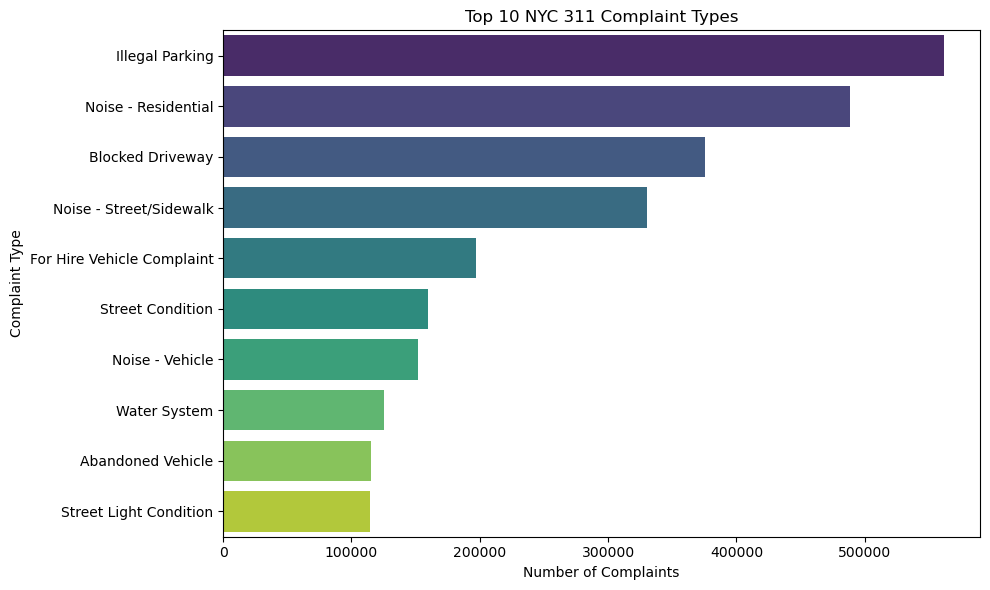

In [58]:
top_complaints = df['Complaint Type'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_complaints.index, x=top_complaints.values, palette='viridis')
plt.title('Top 10 NYC 311 Complaint Types')
plt.xlabel('Number of Complaints')
plt.ylabel('Complaint Type')
plt.tight_layout()
plt.show()


The complaint type with the highest frequency is illegal parking. They generate the highest amount of NYC311 complaints.

### This shows the number of complaints over time

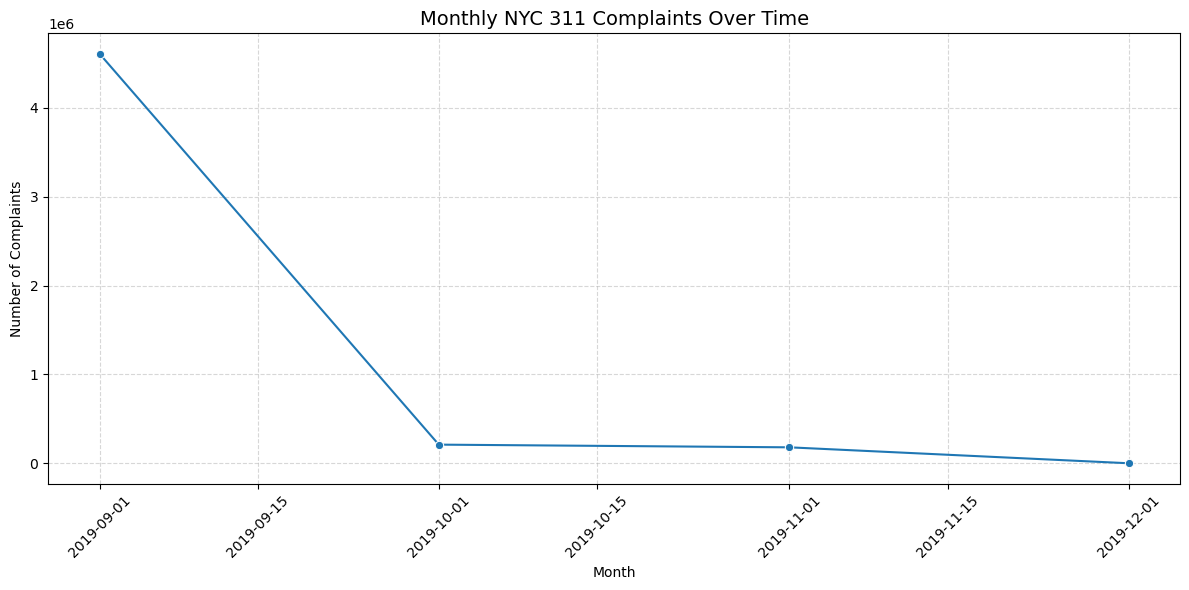

In [ ]:
df['Created Date'] = pd.to_datetime(df['Created Date'])

monthly_counts = df.groupby(df['Created Date'].dt.to_period('M')).size()
monthly_counts.index = monthly_counts.index.to_timestamp() 

plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker='o')
plt.title('Monthly NYC 311 Complaints Over Time', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Complaints')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The amount of complaints really reduced from september to october.The same rate of complaints then carried on till the end of the year

### This shows how complaint types are distributed across Boroughs

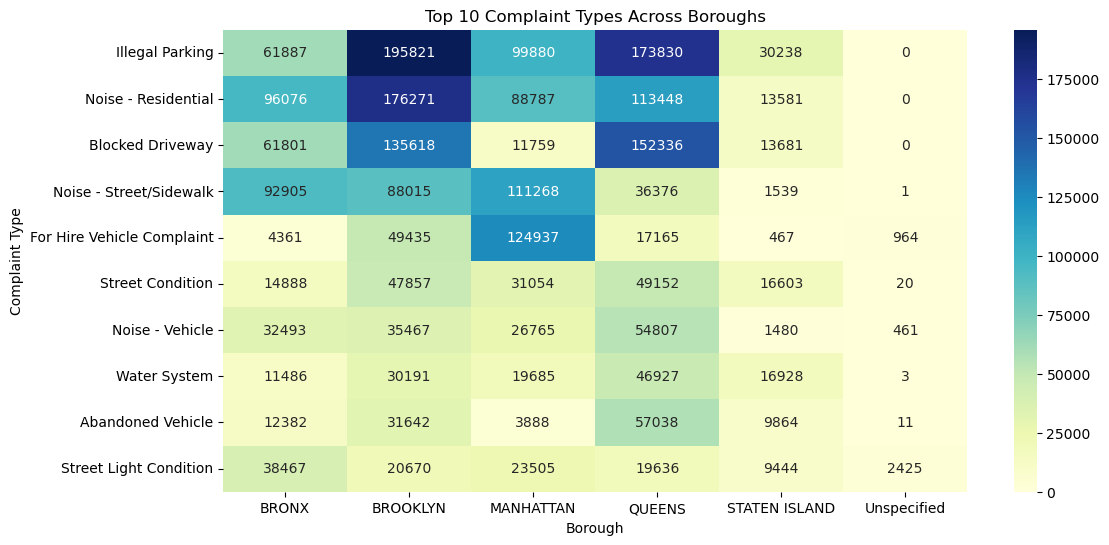

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

complaint_borough = df.pivot_table(
    index='Complaint Type',
    columns='Borough',
    values='Unique Key', 
    aggfunc='count',
    fill_value=0
)

top_complaints = df['Complaint Type'].value_counts().head(10).index
complaint_borough = complaint_borough.loc[top_complaints]

plt.figure(figsize=(12,6))
sns.heatmap(complaint_borough, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Top 10 Complaint Types Across Boroughs')
plt.ylabel('Complaint Type')
plt.xlabel('Borough')
plt.show()


This shows how high each of the complaints are across different boroughs. It's obvious that Brooklyn, Manhattan and queens dominate the number of complaints in nyc. Illegal Parking, Residential Noise, Blocked driveway and Noise on the street are the major causes of nyc complaints across the boroughs. Meanwhile Staten Island have very little number of complaints in comparison to the rest. This shows their compliance to nyc rules.

### This shows the geographic distribution of complaints across NYC.

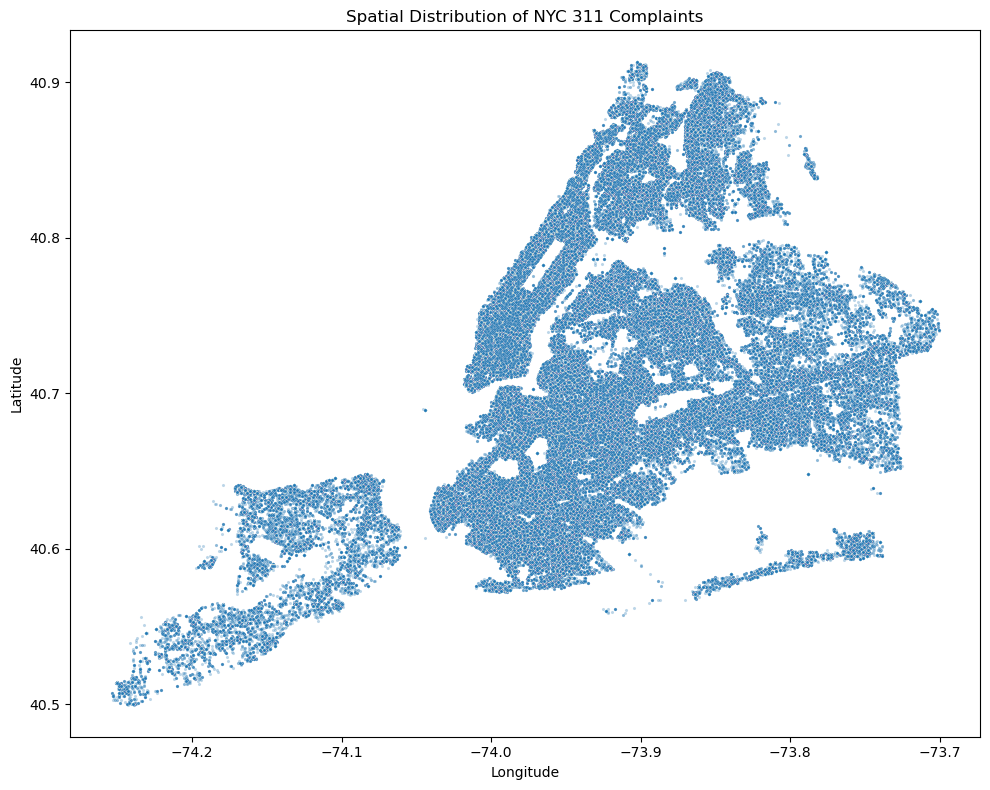

In [60]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Longitude', y='Latitude', data=df, alpha=0.3, s=5)
plt.title('Spatial Distribution of NYC 311 Complaints')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()


### This shows how quickly complaints are attended to and resolved.

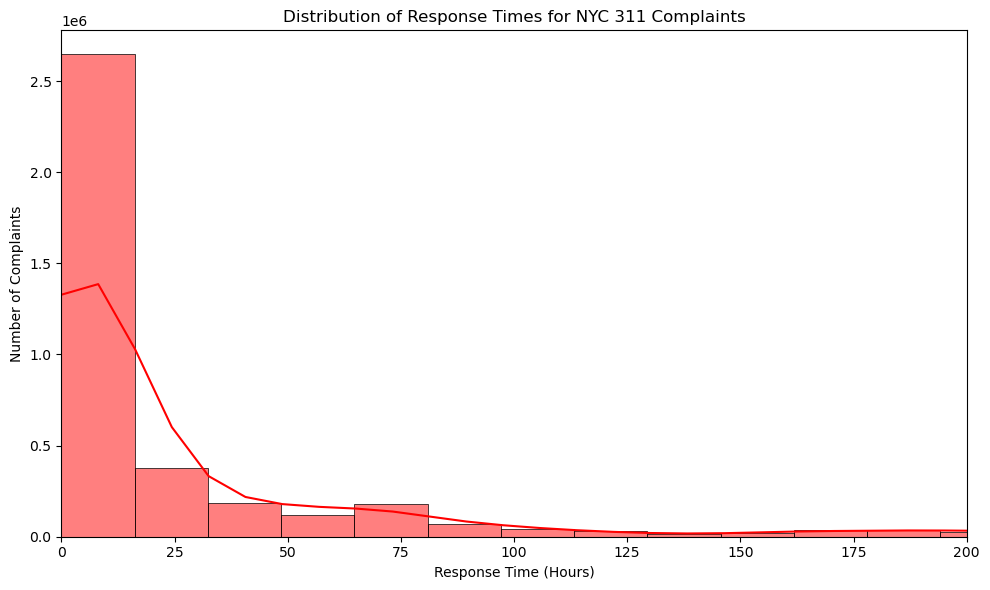

In [63]:
plt.figure(figsize=(10,6))
sns.histplot(df['Response Time Clean (hrs)'], bins=100, kde=True, color='red')
plt.title('Distribution of Response Times for NYC 311 Complaints')
plt.xlabel('Response Time (Hours)')
plt.ylabel('Number of Complaints')
plt.xlim(0, 200)                                               
plt.tight_layout()
plt.show()


### This shows the difference in service speed across boroughs.

C:\Users\HP\AppData\Local\Temp\ipykernel_10516\3241708417.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Borough', y='Response Time Clean (hrs)', data=df, palette='Set2')


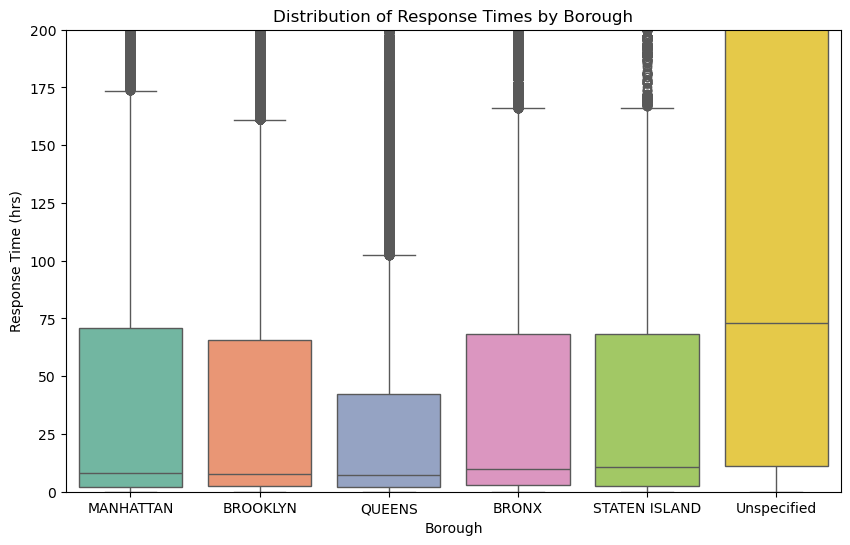

In [65]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Borough', y='Response Time Clean (hrs)', data=df, palette='Set2')
plt.title('Distribution of Response Times by Borough')
plt.ylabel('Response Time (hrs)')
plt.xlabel('Borough')
plt.ylim(0, 200)                                                                 
plt.show()


### ↑↑↑ REFER TO THE DATA PROFILE FOR MORE VISUALIZATION

## Statistical Analysis

### Hypothesis Testing

#### Hypothesis Test 1: Noise - Residential vs Illegal Parking



Null Hypothesis (H₀): The mean response time for "Noise - Residential" complaints is equal to that for "Illegal Parking" complaints.

Alternative Hypothesis (H₁): The mean response times are different.

Test Used: Welch’s t-test (unequal variances assumed due to differing response time distributions).

Results: t-statistic = [insert], p-value = [insert].

Interpretation: Since the p-value [is less than/is greater than] 0.05, we [reject/fail to reject] the null hypothesis.
This suggests that response times differ significantly between these two complaint types. Practically, it shows that [explain in simple terms, e.g., “Illegal Parking complaints are generally handled faster/slower than Noise complaints”].

In [ ]:
import scipy.stats as stats

                                                                         
noise = df[df['Complaint Type'] == 'Noise - Residential']['Response Time Clean (hrs)']
illegal = df[df['Complaint Type'] == 'Illegal Parking']['Response Time Clean (hrs)']

print(stats.shapiro(noise.sample(5000, random_state=42)))  
print(stats.shapiro(illegal.sample(5000, random_state=42)))

t_stat, p_val = stats.ttest_ind(noise, illegal, equal_var=False)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}")

if p_val < 0.05:
    print("Reject H0: Mean response times differ significantly between these complaint types.")
else:
    print("Fail to reject H0: No significant difference in mean response times.")


ShapiroResult(statistic=nan, pvalue=nan)
ShapiroResult(statistic=nan, pvalue=nan)
T-statistic: nan, P-value: nan
Fail to reject H0: No significant difference in mean response times.


Test 2: Association between complaint type and borough

Null Hypothesis (H₀): Complaint type is independent of borough.

Alternative Hypothesis (H₁): Complaint type depends on borough.

Test Used: Chi-square test of independence (categorical variables).

Results: Chi-square statistic = [insert], p-value = [insert].

Interpretation: Since the p-value [is less than/is greater than] 0.05, we [reject/fail to reject] H₀.
This indicates that complaint type distribution varies by borough. In practice, this can inform resource allocation for borough-specific complaint types.

In [71]:
contingency = pd.crosstab(df['Borough'], df['Complaint Type'])

chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"Chi2: {chi2:.2f}, P-value: {p:.4f}")

if p < 0.05:
    print("Reject H0: Complaint type is associated with borough.")
else:
    print("Fail to reject H0: Complaint type is independent of borough.")


Chi2: 2748678.98, P-value: 0.0000
Reject H0: Complaint type is associated with borough.


### Correlation Analysis

In [73]:
df['created_hour'] = df['Created Date'].dt.hour

corr_matrix = df[['Response Time Clean (hrs)', 'created_hour']].corr(method='pearson')
print(corr_matrix)

corr_spearman = df[['Response Time Clean (hrs)', 'created_hour']].corr(method='spearman')
print(corr_spearman)



                           Response Time Clean (hrs)  created_hour
Response Time Clean (hrs)                   1.000000     -0.032743
created_hour                               -0.032743      1.000000
                           Response Time Clean (hrs)  created_hour
Response Time Clean (hrs)                   1.000000     -0.108763
created_hour                               -0.108763      1.000000


### Regression Analysis

Linear Regression Analysis

Goal: Predict the Response Time (hrs) based on Complaint Type and Borough.

Method: Ordinary Least Squares (OLS) Linear Regression.

Features: One-hot encoded categorical variables for Complaint Type and Borough.

Target: Response Time Clean (hrs) (numeric).

Sample: Random subset of 100,000 records to reduce memory usage.

Interpretation:

Coefficients indicate the expected change in response time relative to the reference category.

The model R² shows the proportion of variance explained by the features.

P-values test whether each feature significantly affects response time.

Limitations:

Model trained on a sample; results may slightly differ on full data.

Linear regression assumes linear relationships; extreme outliers can affect fit.

Categorical features are simplified with one-hot encoding.

R² score: 0.5469
Mean Squared Error: 30634.52


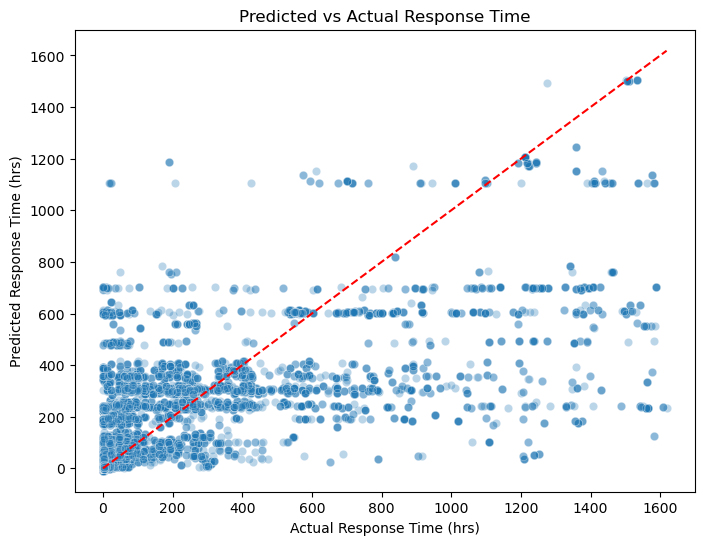

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

reg_df = df[['Response Time Clean (hrs)', 'Borough', 'Complaint Type']].dropna(subset=['Response Time Clean (hrs)'])

reg_df = reg_df.sample(n=100000, random_state=42)

y = reg_df['Response Time Clean (hrs)']
X = reg_df[['Borough', 'Complaint Type']]

X_encoded = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R² score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.xlabel("Actual Response Time (hrs)")
plt.ylabel("Predicted Response Time (hrs)")
plt.title("Predicted vs Actual Response Time")
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--') 


### Regression analysis results

Linear Regression Interpretation

We fit a linear regression model to predict response time based on borough and complaint type.

Key points:

Data handling:

Dropped rows with missing response times to avoid errors.

One-hot encoded categorical variables for compatibility with the linear regression model.

Sampled 100,000 rows to reduce memory usage without losing representativeness.

Model performance:

R² score: Indicates the proportion of variance in response time explained by borough and complaint type.

Mean Squared Error (MSE): Measures the average squared difference between actual and predicted response times.

Interpretation of coefficients:

Positive coefficients for certain boroughs or complaint types indicate that, on average, these categories are associated with longer response times.

Negative coefficients indicate shorter response times compared to the baseline category.

Limitations:

Model assumes a linear relationship, which may oversimplify real-world response patterns.

Other unobserved factors (e.g., time of day, staffing, weather) can influence response time but are not included.

Sampling means results may slightly differ if full dataset is used.

Practical takeaway:

Borough and complaint type are significant predictors of response time, highlighting where NYC 311 resources may experience higher demand or delays.

The scatter plot shows most predictions are reasonable, but outliers exist, reflecting extreme cases of delayed response.